In [1]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries ready to go!")


✅ All libraries ready to go!


In [4]:
# Load Titanic dataset
import pandas as pd

data = pd.read_csv('titanic.csv')

# Show first 5 rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Check missing values
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Fill missing Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop Cabin column
data.drop('Cabin', axis=1, inplace=True)

# Fill missing Embarked with most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verify no missing values remain
data.isnull().sum()


/tmp/ipython-input-1109096699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-1109096699.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


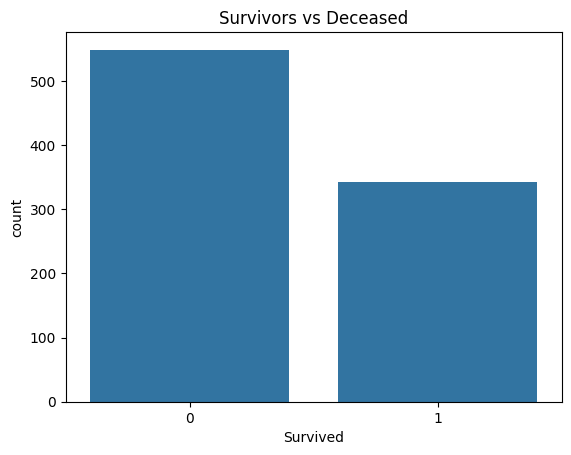

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of survivors
sns.countplot(x='Survived', data=data)
plt.title("Survivors vs Deceased")
plt.show()


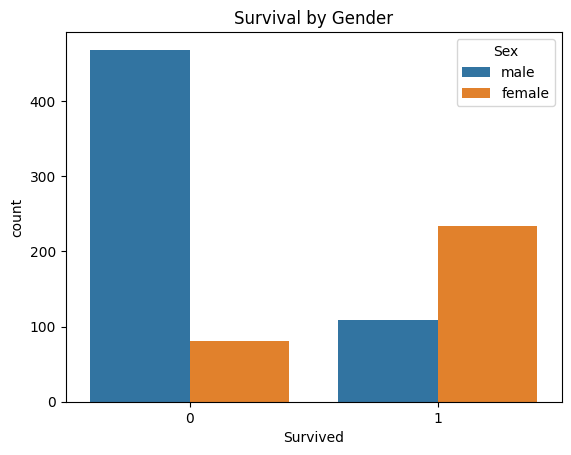

In [11]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title("Survival by Gender")
plt.show()


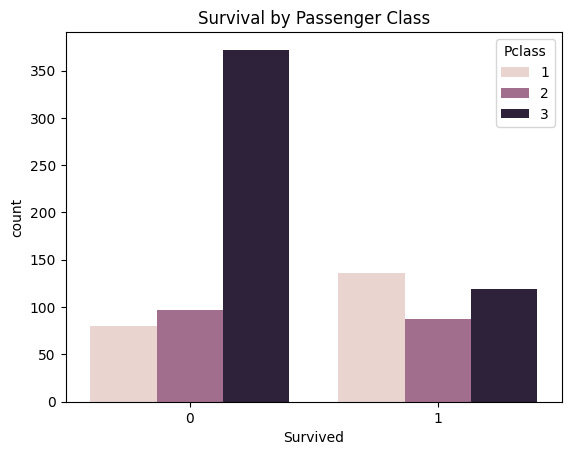

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title("Survival by Passenger Class")
plt.show()


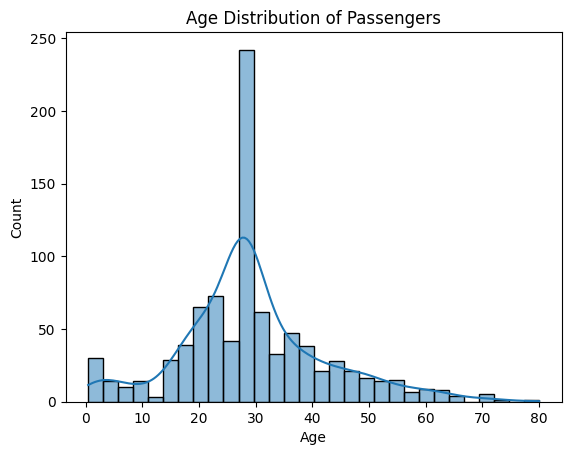

In [13]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


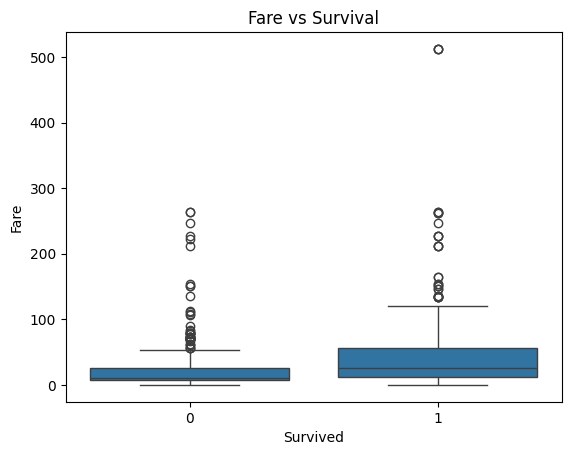

In [14]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Fare vs Survival")
plt.show()


In [15]:
insights = {
    "Observation": [
        "Less than half survived",
        "Females survived more than males",
        "1st class passengers had higher survival",
        "Children had better survival than adults",
        "Higher fare passengers survived more"
    ]
}

insights_df = pd.DataFrame(insights)
insights_df


,Observation
0,Less than half survived
1,Females survived more than males
2,1st class passengers had higher survival
3,Children had better survival than adults
4,Higher fare passengers survived more
